# exercise1 linear regression

## linear regression of simple variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


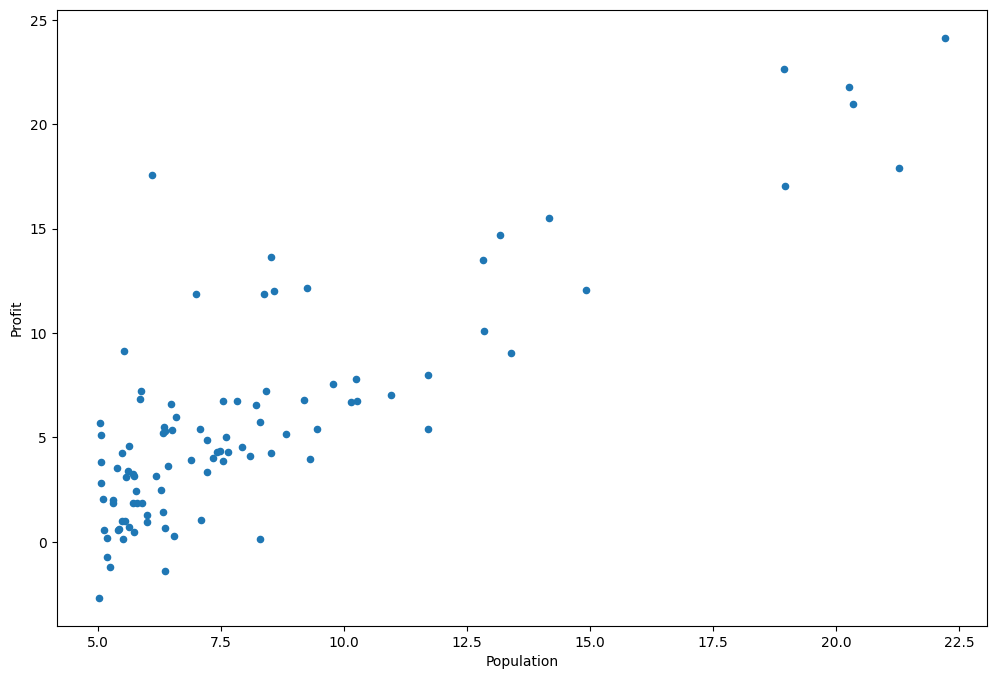

In [4]:
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12, 8))
plt.show()

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))



In [6]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:,cols-1:cols]



In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
theta = np.matrix(np.array([0, 0]))
X = np.matrix(X.values)
y = np.matrix(y.values)

In [11]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
computeCost(X, y, theta) # Cost function

32.072733877455676

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [14]:
alpha = 0.01
iters = 1000

In [15]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g,cost

(matrix([[-3.24140214,  1.1272942 ]]),
 array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
        5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
        5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
        5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
        5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
        5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
        5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
        5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
        5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
        5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
        5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
        5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
        5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
        5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
        5

In [16]:
computeCost(X, y, g)

4.515955503078914

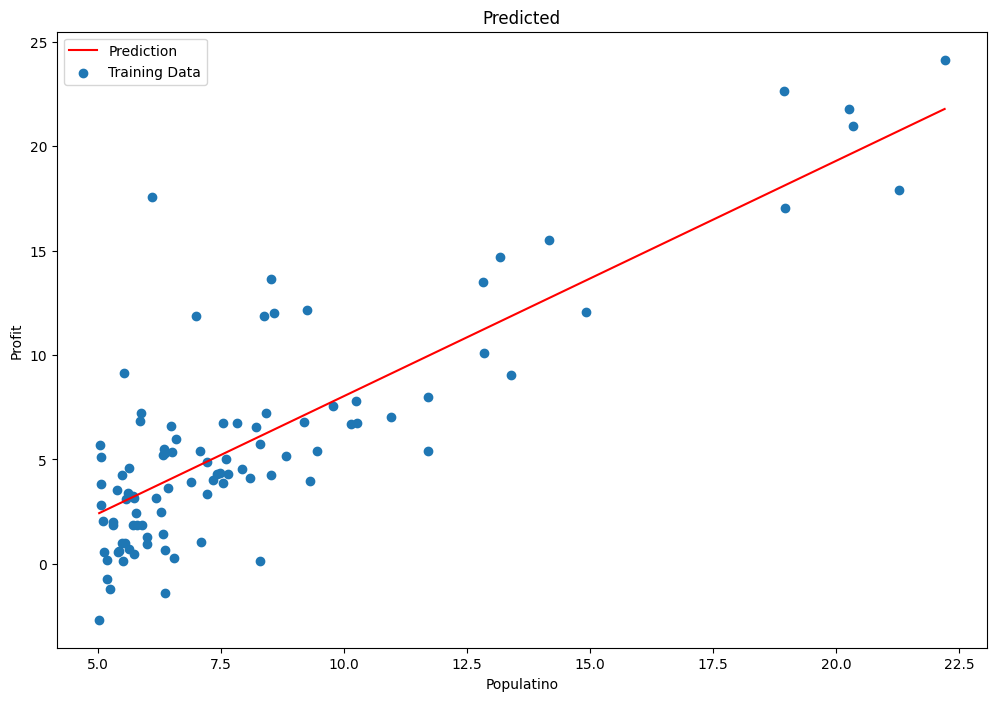

In [17]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label="Prediction")
ax.scatter(data.Population, data.Profit, label="Training Data")
ax.legend(loc=2)
ax.set_xlabel('Populatino')
ax.set_ylabel("Profit")
ax.set_title("Predicted")
plt.show()

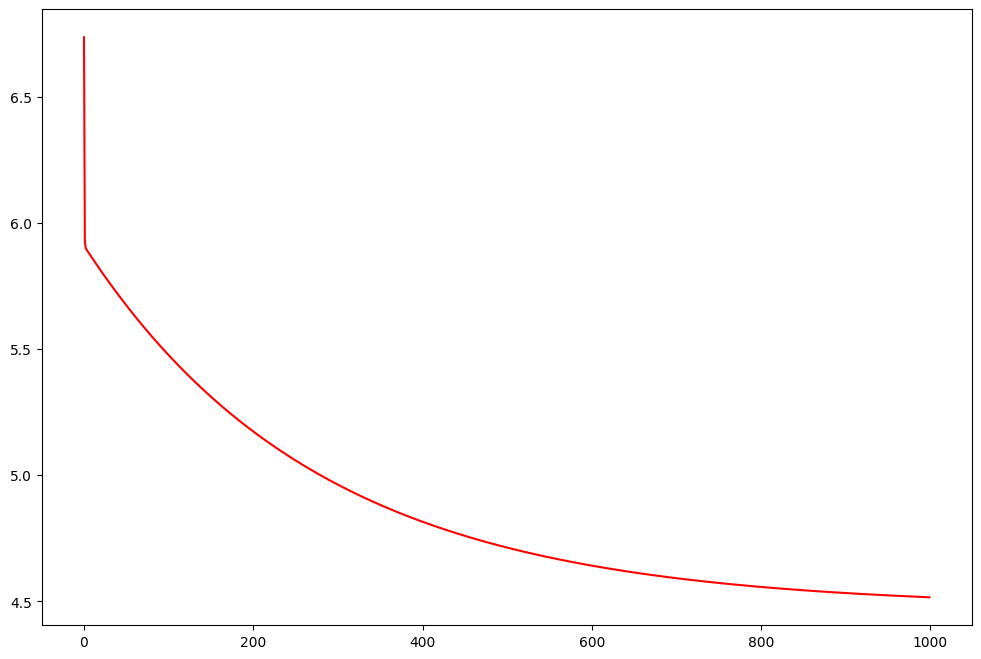

In [18]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
plt.show()

## linear regression of mulitple variables

In [19]:
path = './ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [20]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [21]:
data2.insert(0, "Ones", 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

g2, cost2 = gradientDescent(X2, y2, theta2, 0.01, 1500)

computeCost(X2, y2,g2)


0.13068670606095903

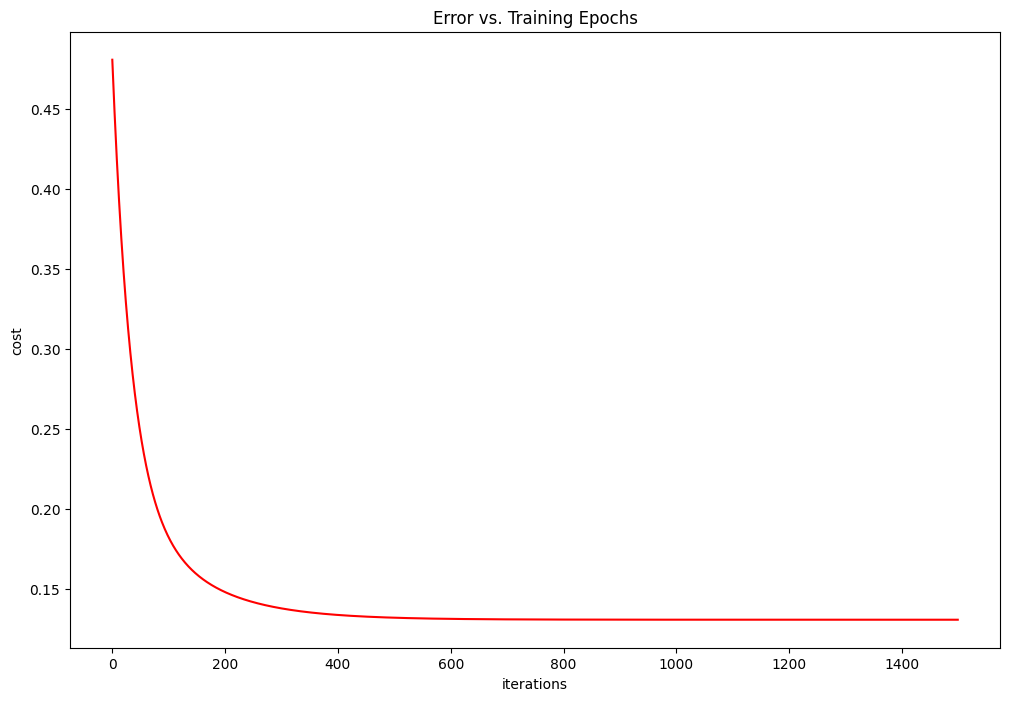

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(1500), cost2, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('Error vs. Training Epochs')
plt.show()

### 直接使用scikit-learn中的线性回归模型

In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

## normal equation

In [24]:
def normalEqu(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [26]:
final_theta2= normalEqu(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

<bound method _AxesBase.set_xlabel of <Axes: >>

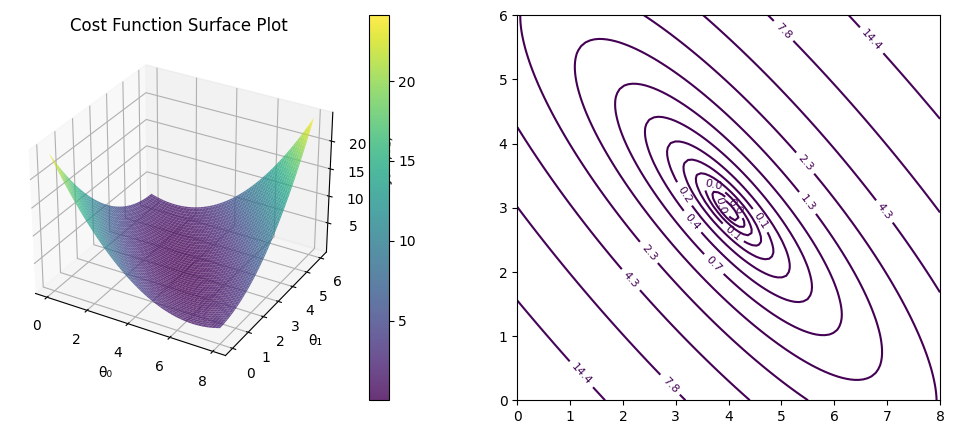

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(20, 1)
y = 4 + 3 * X + np.random.randn(20, 1) * 0.1

# Create mesh grid for theta0 and theta1
theta0_vals = np.linspace(0, 8, 100)
theta1_vals = np.linspace(0, 6, 100)
THETA0, THETA1 = np.meshgrid(theta0_vals, theta1_vals)

# Calculate cost for each theta0, theta1 combination
# Cost function: J(θ₀,θ₁) = 1/(2m) * Σ(hθ(x) - y)²
# where hθ(x) = θ₀ + θ₁x
def compute_cost(theta0, theta1):
    m = len(X)
    predictions = theta0 + theta1 * X
    return np.sum((predictions - y) ** 2) / (2 * m)

J = np.zeros(THETA0.shape)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J[i,j] = compute_cost(THETA0[i,j], THETA1[i,j])

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surface = ax1.plot_surface(THETA0, THETA1, J, cmap='viridis', alpha=0.8)
ax1.set_xlabel('θ₀')
ax1.set_ylabel('θ₁')
ax1.set_zlabel('Cost J(θ₀,θ₁)')
ax1.set_title('Cost Function Surface Plot')
fig.colorbar(surface)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(THETA0, THETA1, J, levels=np.logspace(-2, 3, 20))
ax2.clabel(contour, inline=1, fontsize=8)
ax2.set_xlabel

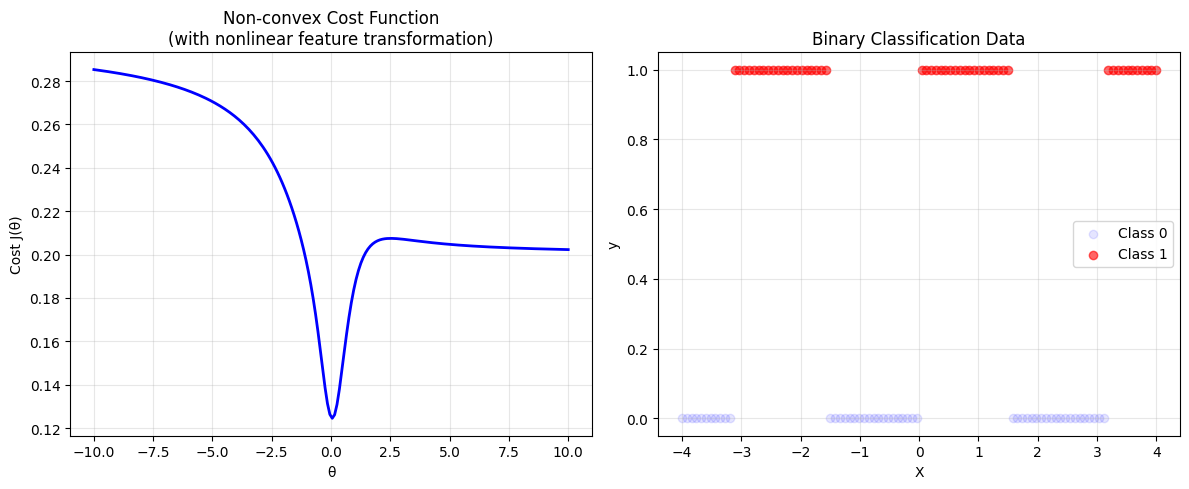

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
X = np.linspace(-4, 4, 100).reshape(-1, 1)
y = (np.sin(2 * X) > 0).astype(float)

# 非线性特征转换
def transform_features(X, theta):
    return 1 / (1 + np.exp(-theta * X))  # 使用sigmoid作为特征转换

# 计算非线性模型的MSE
def compute_nonlinear_mse_cost(theta):
    predictions = transform_features(X, theta)
    return np.mean((predictions - y) ** 2) / 2

# 计算代价
theta_vals = np.linspace(-10, 10, 200)
J_nonlinear = np.array([compute_nonlinear_mse_cost(theta) for theta in theta_vals])

# 绘图
plt.figure(figsize=(12, 5))

plt.subplot(122)
plt.scatter(X[y==0], y[y==0], color='blue', label='Class 0', alpha=0.1)
plt.scatter(X[y==1], y[y==1], color='red', label='Class 1', alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Binary Classification Data')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(121)
plt.plot(theta_vals, J_nonlinear, 'b-', linewidth=2)
plt.xlabel('θ')
plt.ylabel('Cost J(θ)')
plt.title('Non-convex Cost Function\n(with nonlinear feature transformation)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()